In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize
from scipy.stats import median_abs_deviation
from sklearn.preprocessing import MinMaxScaler

In [49]:
df_caserne_risk = pd.read_csv('caserne-risk.csv')
print(df_caserne_risk.shape)
df_caserne_risk.head()

(14543, 11)


,YEAR,MONTH,CASERNE,MEDIAN_NOMBRE_UNITES,FIRE_COUNT,AREA_SQ_KM,FIRE_COUNT_SQ_KM,LOG_MEDIAN_NOMBRE_UNITES,LOG_FIRE_COUNT_SQ_KM,SEVERITY_RISK,FREQUENCY_RISK
0,2005,1,4,8.0,2,5.47,0.37,2.079442,0.314811,47.0,10.0
1,2005,1,5,4.0,7,1.31,5.34,1.386294,1.846879,32.0,63.0
2,2005,1,8,3.0,3,12.33,0.24,1.098612,0.215111,25.0,6.0
3,2005,1,9,4.5,12,9.29,1.29,1.504077,0.828552,34.0,27.0
4,2005,1,10,8.0,4,2.65,1.51,2.079442,0.920283,47.0,31.0


In [50]:
df_weather = pd.read_csv('weather-clean.csv')
df_weather = df_weather.rename(columns={
    'year':'YEAR',
    'month':'MONTH',
    'temperature_max':'TEMPERATURE_MAX',
    'temperature_min':'TEMPERATURE_MIN',
    'temperature_mean':'TEMPERATURE_MEAN',
    'precipitation_sum':'PRECIPITATION_SUM',
    'wind_speed_max':'WIND_SPEED_MAX',
    'wind_gusts_max':'WIND_GUSTS_MAX',
})
print(df_weather.shape)
df_weather.head()

(240, 8)


,YEAR,MONTH,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_MEAN,PRECIPITATION_SUM,WIND_SPEED_MAX,WIND_GUSTS_MAX
0,2005,1,8.8,-31.6,-13.4,47.1,27.6,68.4
1,2005,2,3.6,-23.0,-8.4,52.2,26.3,56.9
2,2005,3,13.4,-19.9,-5.1,41.5,30.6,69.8
3,2005,4,20.1,-4.5,5.4,159.4,27.5,70.6
4,2005,5,23.1,-1.2,9.6,65.7,27.8,58.7


In [51]:
df_merged = pd.merge(df_caserne_risk, df_weather, on=['YEAR','MONTH'], how='left')
df_merged = df_merged[[
    'TEMPERATURE_MAX',
    'TEMPERATURE_MIN',
    'TEMPERATURE_MEAN',
    'PRECIPITATION_SUM',
    'WIND_SPEED_MAX',
    'WIND_GUSTS_MAX',
    'SEVERITY_RISK',
    'FREQUENCY_RISK',
]]
print(df_merged.shape)
df_merged.describe()


(14543, 8)


,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_MEAN,PRECIPITATION_SUM,WIND_SPEED_MAX,WIND_GUSTS_MAX,SEVERITY_RISK,FREQUENCY_RISK
count,14543.00000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000
mean,19.43927,-5.923001,6.374022,92.702070,31.377989,68.388682,16.875266,22.631644
std,9.79032,13.535337,10.823099,37.596661,5.663123,11.048191,19.157746,15.563566
min,-4.40000,-33.900000,-16.800000,15.700000,20.100000,47.900000,0.000000,0.000000
25%,9.80000,-19.500000,-4.000000,67.900000,27.200000,59.800000,0.000000,11.000000
50%,21.70000,-3.600000,6.800000,88.800000,30.900000,67.000000,9.000000,20.000000
75%,28.30000,6.200000,16.700000,114.700000,34.800000,74.900000,32.000000,32.000000
max,33.00000,14.500000,22.700000,227.100000,53.500000,112.700000,100.000000,100.000000


In [52]:
df_merged.corr()

,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_MEAN,PRECIPITATION_SUM,WIND_SPEED_MAX,WIND_GUSTS_MAX,SEVERITY_RISK,FREQUENCY_RISK
TEMPERATURE_MAX,1.000000,0.932240,0.960669,0.237215,-0.368271,-0.245795,-0.404615,0.272549
TEMPERATURE_MIN,0.932240,1.000000,0.984008,0.291129,-0.416551,-0.304175,-0.394343,0.245756
TEMPERATURE_MEAN,0.960669,0.984008,1.000000,0.270390,-0.426755,-0.309608,-0.397170,0.252089
PRECIPITATION_SUM,0.237215,0.291129,0.270390,1.000000,0.009823,0.042395,-0.079108,0.008556
WIND_SPEED_MAX,-0.368271,-0.416551,-0.426755,0.009823,1.000000,0.854713,0.174467,-0.131770
WIND_GUSTS_MAX,-0.245795,-0.304175,-0.309608,0.042395,0.854713,1.000000,0.124823,-0.085394
SEVERITY_RISK,-0.404615,-0.394343,-0.397170,-0.079108,0.174467,0.124823,1.000000,-0.223491
FREQUENCY_RISK,0.272549,0.245756,0.252089,0.008556,-0.131770,-0.085394,-0.223491,1.000000


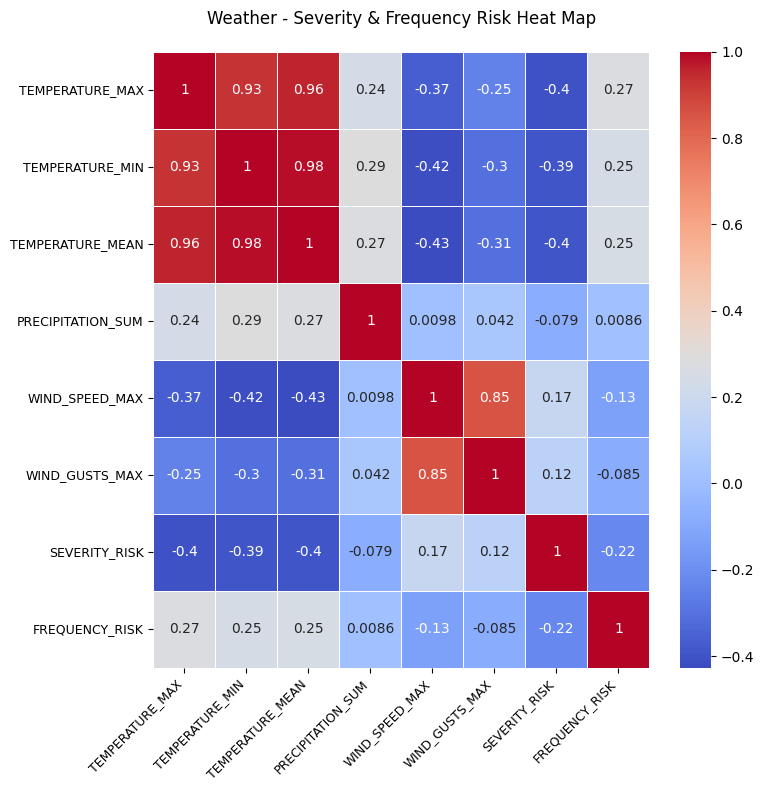

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Weather - Severity & Frequency Risk Heat Map', pad=20)
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)
plt.show()

In [54]:
df_merged['OVERALL_RISK'] = ((df_merged['SEVERITY_RISK'] + df_merged['FREQUENCY_RISK'])/2).round(0)
df_merged.head()

,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_MEAN,PRECIPITATION_SUM,WIND_SPEED_MAX,WIND_GUSTS_MAX,SEVERITY_RISK,FREQUENCY_RISK,OVERALL_RISK
0,8.8,-31.6,-13.4,47.1,27.6,68.4,47.0,10.0,28.0
1,8.8,-31.6,-13.4,47.1,27.6,68.4,32.0,63.0,48.0
2,8.8,-31.6,-13.4,47.1,27.6,68.4,25.0,6.0,16.0
3,8.8,-31.6,-13.4,47.1,27.6,68.4,34.0,27.0,30.0
4,8.8,-31.6,-13.4,47.1,27.6,68.4,47.0,31.0,39.0


In [55]:
df_merged.corr()

,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_MEAN,PRECIPITATION_SUM,WIND_SPEED_MAX,WIND_GUSTS_MAX,SEVERITY_RISK,FREQUENCY_RISK,OVERALL_RISK
TEMPERATURE_MAX,1.000000,0.932240,0.960669,0.237215,-0.368271,-0.245795,-0.404615,0.272549,-0.160568
TEMPERATURE_MIN,0.932240,1.000000,0.984008,0.291129,-0.416551,-0.304175,-0.394343,0.245756,-0.170728
TEMPERATURE_MEAN,0.960669,0.984008,1.000000,0.270390,-0.426755,-0.309608,-0.397170,0.252089,-0.168698
PRECIPITATION_SUM,0.237215,0.291129,0.270390,1.000000,0.009823,0.042395,-0.079108,0.008556,-0.063270
WIND_SPEED_MAX,-0.368271,-0.416551,-0.426755,0.009823,1.000000,0.854713,0.174467,-0.131770,0.058925
WIND_GUSTS_MAX,-0.245795,-0.304175,-0.309608,0.042395,0.854713,1.000000,0.124823,-0.085394,0.048443
SEVERITY_RISK,-0.404615,-0.394343,-0.397170,-0.079108,0.174467,0.124823,1.000000,-0.223491,0.717587
FREQUENCY_RISK,0.272549,0.245756,0.252089,0.008556,-0.131770,-0.085394,-0.223491,1.000000,0.517738
OVERALL_RISK,-0.160568,-0.170728,-0.168698,-0.063270,0.058925,0.048443,0.717587,0.517738,1.000000


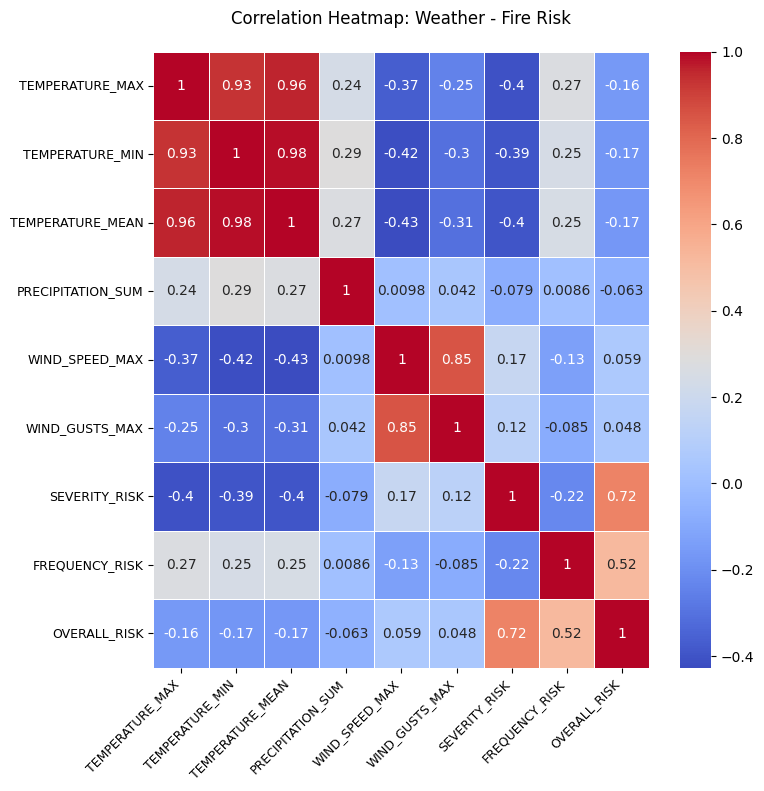

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Weather - Fire Risk', pad=20)
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)
plt.show()